# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING PCA</font>

In [27]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [28]:
pd.options.display.float_format = '{:.2f}'.format

In [29]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean2.csv', low_memory=False)

In [30]:
master_df.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,night_0.0.1,night_1.0.1,night_0.0.2,night_1.0.2,fb_0.0,fb_1.0,fb_0.0.1,fb_1.0.1,fb_0.0.2,fb_1.0.2
0,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0,0,0,0,0,0,0,0,0,0
1,7002311591,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,...,0,0,0,0,0,0,0,0,0,0
2,7000959346,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,7000104470,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,...,0,0,0,0,0,0,0,0,0,0
4,7000409785,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#list(master_df)

In [32]:
master_df.shape

(28504, 156)

In [33]:
telecom = master_df.drop(['mobile_number'], 1)
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)
telecom = telecom.drop(['fb_churn_6', 'fb_churn_7', 'fb_churn_8', 'night_pck_churn_6', 'night_pck_churn_7', 'night_pck_churn_8'], 1)


In [34]:
telecom.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,night_0.0.1,night_1.0.1,night_0.0.2,night_1.0.2,fb_0.0,fb_1.0,fb_0.0.1,fb_1.0.1,fb_0.0.2,fb_1.0.2
0,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0,0,0,0,0,0,0,0,0,0
1,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,10.69,...,0,0,0,0,0,0,0,0,0,0
2,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,0.00,...,0,0,0,0,0,0,0,0,0,0
4,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,613.84,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#list(telecom)

## Create X, y variables

In [36]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

In [37]:
X.shape

(28504, 142)

## Applying standard scale

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)

## Lasso

In [49]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X)
pos = model.get_support(indices=True)
 
print(X_lasso.shape)
print(pos)

(28504, 88)
[  0   5   6   7   9  10  11  12  15  19  20  21  22  23  30  31  34  35
  36  37  38  40  42  43  44  45  46  47  49  50  54  55  56  57  61  62
  63  64  65  67  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  94  95  96  98 101 102 103 104 106 107 108 109 110 111
 112 117 118 120 121 123 124 126 127 128 129 131 134 135 138 141]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


# applying smote to balance the data set

In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_lasso,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(53816, 88)
(53816,)


26908

## Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr, train_size=0.7,random_state=42)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [59]:
print(X_train.shape)
print (y_train.shape)
print(X_test.shape)

(37671, 88)
(37671,)
(16145, 88)


In [60]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
      

Feature space holds 28504 observations and 142 features
Unique target labels: [0 1]


# applying decision tree with default hyperparameter

In [63]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

#print(y_pred_default)
#print(y_test)


             precision    recall  f1-score   support

          0       0.88      0.88      0.88      8042
          1       0.88      0.89      0.88      8103

avg / total       0.88      0.88      0.88     16145



In [66]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7077  965]
 [ 930 7173]]
0.8826262000619387


# Tuning max_depth

In [67]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [68]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.36,0.00,0.80,0.80,1,{'max_depth': 1},39,0.81,0.80,0.80,...,0.81,0.80,0.80,0.80,0.80,0.80,0.02,0.00,0.00,0.00
1,0.71,0.01,0.82,0.82,2,{'max_depth': 2},38,0.83,0.83,0.82,...,0.82,0.82,0.83,0.83,0.82,0.82,0.01,0.00,0.01,0.00
2,1.03,0.00,0.84,0.85,3,{'max_depth': 3},37,0.84,0.85,0.84,...,0.85,0.85,0.85,0.84,0.85,0.85,0.03,0.00,0.00,0.00
3,1.30,0.01,0.87,0.87,4,{'max_depth': 4},36,0.87,0.87,0.86,...,0.86,0.87,0.87,0.87,0.88,0.87,0.03,0.00,0.00,0.00
4,1.48,0.01,0.88,0.89,5,{'max_depth': 5},35,0.88,0.88,0.88,...,0.88,0.89,0.88,0.89,0.88,0.89,0.11,0.00,0.00,0.00


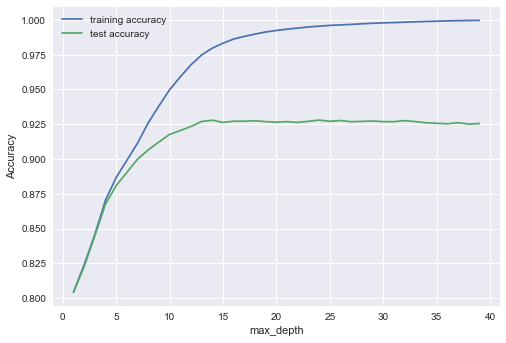

In [69]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


conclusion for max depth:
You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score is constant. Note that the scores are average accuracies across the 5-folds.

we can consider max_depth=10

# Tuning min_samples_leaf

In [70]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [71]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.56,0.01,0.92,0.97,5,{'min_samples_leaf': 5},1,0.92,0.97,0.92,...,0.92,0.97,0.92,0.97,0.92,0.97,0.58,0.00,0.00,0.00
1,3.69,0.01,0.91,0.93,25,{'min_samples_leaf': 25},2,0.91,0.93,0.90,...,0.91,0.93,0.91,0.93,0.91,0.93,0.42,0.00,0.00,0.00
2,3.30,0.01,0.90,0.92,45,{'min_samples_leaf': 45},3,0.90,0.92,0.90,...,0.90,0.92,0.90,0.92,0.90,0.92,0.33,0.00,0.00,0.00
3,3.26,0.01,0.90,0.91,65,{'min_samples_leaf': 65},4,0.90,0.91,0.90,...,0.89,0.91,0.90,0.91,0.90,0.91,0.25,0.00,0.00,0.00
4,3.19,0.01,0.89,0.90,85,{'min_samples_leaf': 85},5,0.89,0.90,0.89,...,0.89,0.90,0.89,0.90,0.89,0.90,0.22,0.00,0.00,0.00


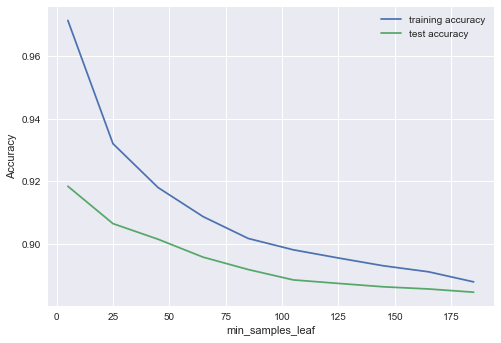

In [72]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


conclusion for min_samples_leaf:
at low values of min_samples_leaf seems overfitted. At values 125,the model becomes more stable and the training and test accuracy start to converge.
min_samples_leaf=125

# Tuning min_samples_split

In [73]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [74]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,5.20,0.01,0.92,1.00,5,{'min_samples_split': 5},1,0.93,1.00,0.92,...,0.92,0.99,0.92,1.00,0.93,0.99,0.67,0.00,0.00,0.00
1,5.04,0.01,0.92,0.97,25,{'min_samples_split': 25},2,0.92,0.97,0.92,...,0.92,0.97,0.91,0.97,0.92,0.97,0.46,0.00,0.00,0.00
2,4.93,0.01,0.91,0.96,45,{'min_samples_split': 45},3,0.91,0.96,0.91,...,0.91,0.96,0.91,0.96,0.91,0.96,0.49,0.00,0.00,0.00
3,4.82,0.01,0.91,0.95,65,{'min_samples_split': 65},4,0.91,0.95,0.91,...,0.91,0.95,0.91,0.95,0.91,0.95,0.51,0.00,0.00,0.00
4,5.09,0.01,0.91,0.94,85,{'min_samples_split': 85},5,0.91,0.94,0.90,...,0.91,0.94,0.91,0.94,0.91,0.94,0.38,0.00,0.00,0.00


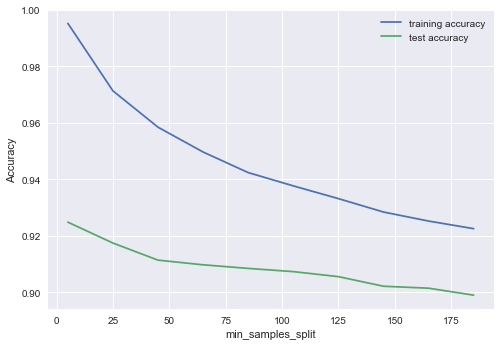

In [75]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as increase min_samples_split, the tree overfits lesser since the model is less complex

In [76]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [77]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.30,0.01,0.88,0.88,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",11,...,0.88,0.89,0.88,0.88,0.88,0.88,0.03,0.00,0.00,0.00
1,2.17,0.01,0.88,0.88,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",11,...,0.88,0.89,0.88,0.88,0.88,0.88,0.09,0.00,0.00,0.00
2,2.32,0.01,0.87,0.88,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.88,0.88,0.88,0.88,0.87,0.87,0.16,0.00,0.00,0.00
3,2.31,0.01,0.87,0.88,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.88,0.88,0.88,0.88,0.87,0.87,0.01,0.00,0.00,0.00
4,3.79,0.01,0.90,0.92,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1,...,0.90,0.92,0.91,0.92,0.90,0.92,0.06,0.00,0.00,0.00
5,3.79,0.01,0.90,0.92,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1,...,0.90,0.92,0.91,0.92,0.90,0.92,0.09,0.00,0.00,0.00
6,3.61,0.01,0.89,0.90,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.89,0.90,0.90,0.90,0.89,0.90,0.17,0.00,0.00,0.00
7,3.56,0.01,0.89,0.90,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.89,0.90,0.90,0.90,0.89,0.90,0.10,0.00,0.00,0.00
8,1.64,0.00,0.88,0.89,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.88,0.89,0.88,0.89,0.89,0.89,0.02,0.00,0.00,0.00
9,1.63,0.00,0.88,0.89,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.88,0.89,0.88,0.89,0.89,0.89,0.02,0.00,0.00,0.00


In [78]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9029757638501765
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [84]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [85]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9013316816351812